# Importing Required Libraries and Set Up of the Environment

Uncomment the next lines of code to install the libraries used in this project

In [ ]:
pip install pandas numpy python-dotenv matplotlib seaborn plotly nltk spacy bertopic transformers sentence-transformers gensim pyLDAvis scikit-learn "tensorflow<2.14" hdbscan tf-keras pyarrow

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
typing-inspection 0.4.1 requires typing-extensions>=4.12.0, but you have typing-extensions 4.5.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.13.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tf-keras~=2.17, but you have tf-keras 2.15.0 which is incompatible.
openai 1.81.0 requires typing-extensions<5,>=4.11, but 

In [ ]:
pip install openai

  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.13.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tf-keras~=2.17, but you have tf-keras 2.15.0 which is incompatible.
google-genai 1.16.1 requires pydantic<3.0.0,>=2.0.0, bu

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import os
import random
from collections import defaultdict
from dotenv import load_dotenv
import ast

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Natural Language Processing
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from tqdm import tqdm
import spacy.cli
spacy.cli.download("en_core_web_md")
spacy.cli.download("de_core_news_md")
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api

# openai api
from openai import OpenAI

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from hdbscan import HDBSCAN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Set a seed for reproducibility
SEED = 42

def set_global_seed(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    return

set_global_seed(SEED)

---
# Data Collection

In this section we imported and inspected the raw data downloaded from: https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets/data .

### Dataset Description
The dataset is about Customer IT Support and each record is a support ticket opened by customers.
Here is a summary of the features:

- **Subject**: Subject of the customer's email;
- **Body**: Body of the customer's email;
- **Answer**: The response provided by the helpdesk agent, containing the resolution or further instructions;
- **Type**: Different types of tickets categorized to understand the nature of the requests or issues;
- **Queue**: Specifies the department to which the email ticket is routed. This helps in routing the ticket to the appropriate support team for resolution;
- **Priority**: Indicates the urgency and importance of the issue. Helps in managing the workflow by prioritizing tickets that need immediate attention;
- **Language**: Indicates the language in which the email is written;
- **Tags**: Tags/categories assigned to the ticket, split into ten columns in the dataset.

### Steps
1. We uploaded the dataset using the pandas library and we displayed the first rows.
2. We printed the shape of the dataset (number of rows and cols), the number of missing values and the number of duplicate rows.
3. We removed the cols that are unclear because of the not detailed description in the documentation.

In [ ]:
# Let's load the dataset as a pandas dataframe
df = pd.read_csv('data.csv')

# visualizing the first rows of the data
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [ ]:
# Shape of the dataset
print("Shape of the dataset (rows, cols):", df.shape)

# Missing values (if any)
print("\nMissing values in each col:")
missing_values_count = df.isnull().sum()
missing_values_perc= (missing_values_count / df.shape[0]) * 100
missing_values = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage': round(missing_values_perc,1)})
print(missing_values)

# Duplicates rows (if any)
duplicates_rows = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicates_rows}")

Shape of the dataset (rows, cols): (28587, 16)

Missing values in each col:
          Missing Values  Percentage
subject             3838        13.4
body                   0         0.0
answer                 7         0.0
type                   0         0.0
queue                  0         0.0
priority               0         0.0
language               0         0.0
version                0         0.0
tag_1                  0         0.0
tag_2                 13         0.0
tag_3                136         0.5
tag_4               3058        10.7
tag_5              14042        49.1
tag_6              22713        79.5
tag_7              26547        92.9
tag_8              28022        98.0

 Number of duplicate rows: 0


In [ ]:
# the description of certain cols is not clear, we decide to drop columns version, tag_2, tag_3, tag_4, tag_5, tag_6, tag_7, tag_8
cols_to_drop = ['version', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,subject,body,answer,type,queue,priority,language,tag_1
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,Security
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,Account
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,Product
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,Billing
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,Product


---
# Exploratory Data Analysis

In this section we performed an exploratory analysis to understand the data and how it is structured.

### Overview of the Textual Features
For each of the three text columns we computed:
- the number of entries;
- the number of null entries;
- the percentage of null entries.

### Overview of the Categorical Features
For each categorical feature we explored:
- the unique values;
- their distribution.  
  
Then we also printed 2 charts representing how the type is distributed among tickets with different priority and different assigned department.

In [ ]:
def get_col_overview(df, col_name):
    """
    This function takes a dataframe and a column name as input and returns the number of entries, null entries, and percentage of null entries in that column.
    """
    print(f"\nOverview of the '{col_name}' column:")
    # number of entries in the column
    entries_count = df[col_name].value_counts().sum()
    # number of null entries in the column
    null_count = df[col_name].isnull().sum()
    # percentage of null entries in the column
    null_perc = (null_count / df.shape[0]) * 100

    # print the results
    print(f"# of entries: {entries_count}")
    print(f"# of null entries: {null_count}")
    print(f"% of null entries: {null_perc:.2f}%")
    return

def plot_col_distribution(df, col_name, rotation_xticks= 90, fontsize_xticks= 14, top_n= None):
    """
    This function takes a dataframe and a column name as input and creates a bar plot showing the distribution of values in that column.
    """

    # counts and percentages of each value in the column
    counts = df[col_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # if top_n is specified, keep only the top_n values
    if top_n is not None:
        counts = counts.head(top_n)
        percentages = percentages.head(top_n)

    # create bar plot
    plt.figure(figsize=(8, 6))
    bars = plt.bar(counts.index, counts.values, color='dimgray', edgecolor='black')

    # add the counts and percentages on top of the bars
    for bar, count, perc in zip(bars, counts.values, percentages):
        label = f'{count}\n({perc:.1f}%)'
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + (bar.get_height() * 0.01),
            label,
            ha='center',
            va='bottom',
            fontsize=12,
            color='dimgray',
            fontweight='bold'
        )

    # set the y-axis limit
    max_y = counts.max() + (counts.max() * 0.15)
    plt.ylim(0, max_y)

    # add titles and labels
    if top_n is not None:
        plt.title(f'Top {top_n} values of "{col_name}" ', fontsize=24)
    else:
        plt.title(f'Distribution of "{col_name}" ', fontsize=24)
    plt.ylabel("Number of Records", fontsize= 14)
    plt.xticks(rotation=rotation_xticks, ha='center', fontsize=fontsize_xticks)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='-', alpha=0.2)
    plt.show()

def plot_grouped_percentage_bar(df, group_col_name, target_col_name, rotation_xticks= 90, fontsize_xticks= 14):
    """
    This function takes a dataframe and two column names as input and creates a bar plot showing the percentage of each value in the target column grouped by the values in the group column.
    """

    #compute counts and percentages
    counts= df.groupby([group_col_name, target_col_name]).size().unstack(fill_value=0)
    perc= counts.div(counts.sum(axis=1), axis=0) * 100

    # color palette
    num_categories = perc.shape[1]
    cmap = plt.get_cmap('Greys')
    colors = [cmap(0.3 + 0.6 * i / (num_categories - 1)) for i in range(num_categories)]

    # plot the grouped percentage bar
    ax= perc.plot.bar(figsize=(8,5), color=colors, edgecolor="black")

    ax.set_title(f"{target_col_name.title()} Distribution by {group_col_name.title()}", fontsize=14)
    ax.set_ylabel("Percentage")
    ax.legend(title=target_col_name.title(), bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.xticks(rotation=rotation_xticks, ha='center', fontsize=fontsize_xticks)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='-', alpha=0.2)
    plt.show()


In [ ]:
# Let's get an overview of the text columns
get_col_overview(df, 'subject')
get_col_overview(df, 'body')
get_col_overview(df, 'answer')


Overview of the 'subject' column:
# of entries: 24749
# of null entries: 3838
% of null entries: 13.43%

Overview of the 'body' column:
# of entries: 28587
# of null entries: 0
% of null entries: 0.00%

Overview of the 'answer' column:
# of entries: 28580
# of null entries: 7
% of null entries: 0.02%


In [ ]:
# unique values of cols "type", "queue", "priority", "language", "tag_1"
cols = ["type", "queue", "priority", "language", "tag_1"]
uniques = pd.DataFrame({
    "Column": cols,
    "N. of Unique Values": [df[col].nunique() for col in cols],
    "Unique Values": [df[col].unique().tolist() if df[col].nunique() <= 5 else "Too many to show" for col in cols]
})

uniques

,Column,N. of Unique Values,Unique Values
0,type,4,"[Incident, Request, Problem, Change]"
1,queue,10,Too many to show
2,priority,3,"[high, medium, low]"
3,language,2,"[de, en]"
4,tag_1,116,Too many to show



Overview of the 'type' column:
# of entries: 28587
# of null entries: 0
% of null entries: 0.00%


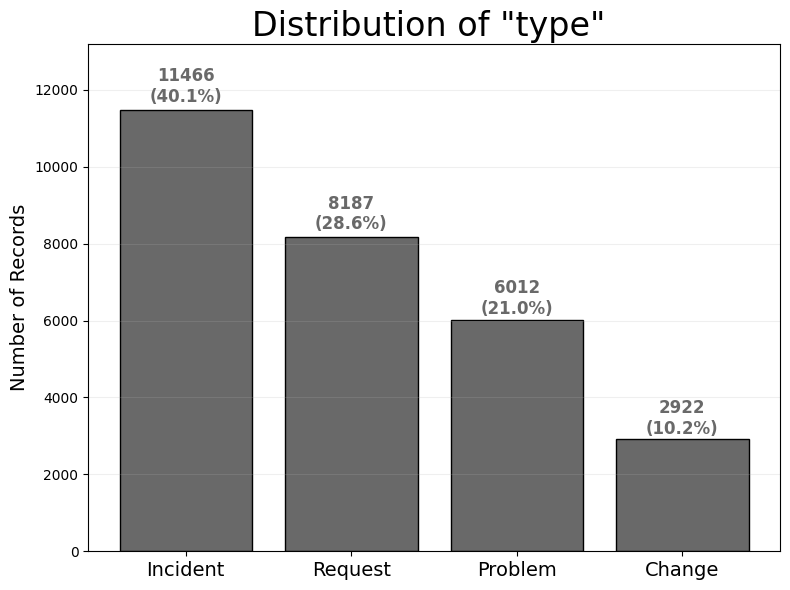

In [ ]:
# Let's analyze the distribution of "type" col
get_col_overview(df, 'type')
plot_col_distribution(df, 'type', rotation_xticks= 0, fontsize_xticks= 14)


Overview of the 'queue' column:
# of entries: 28587
# of null entries: 0
% of null entries: 0.00%


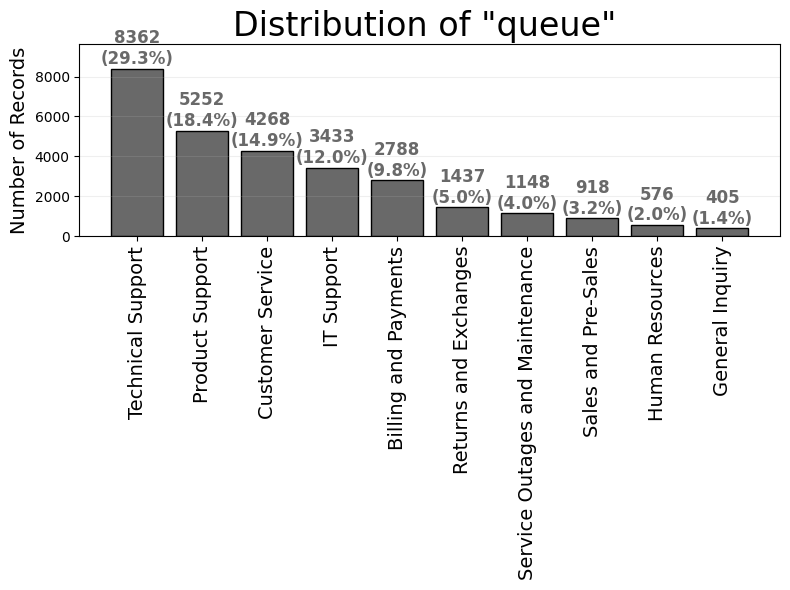

In [ ]:
# Let's analyze the distribution of "queue" col
get_col_overview(df, 'queue')
plot_col_distribution(df, 'queue', rotation_xticks= 90, fontsize_xticks= 14)


Overview of the 'priority' column:
# of entries: 28587
# of null entries: 0
% of null entries: 0.00%


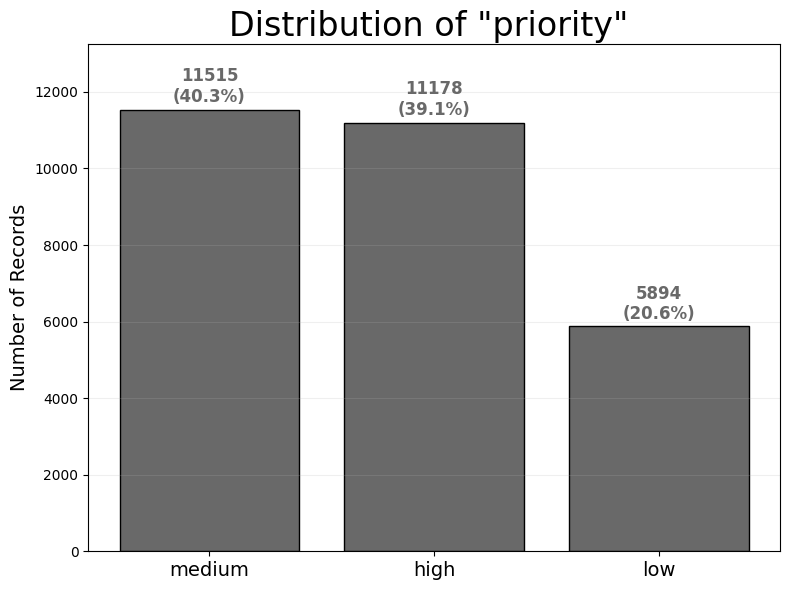

In [ ]:
# Let's analyze the distribution of "priority" col
get_col_overview(df, 'priority')
plot_col_distribution(df, 'priority', rotation_xticks= 0, fontsize_xticks= 14)


Overview of the 'language' column:
# of entries: 28587
# of null entries: 0
% of null entries: 0.00%


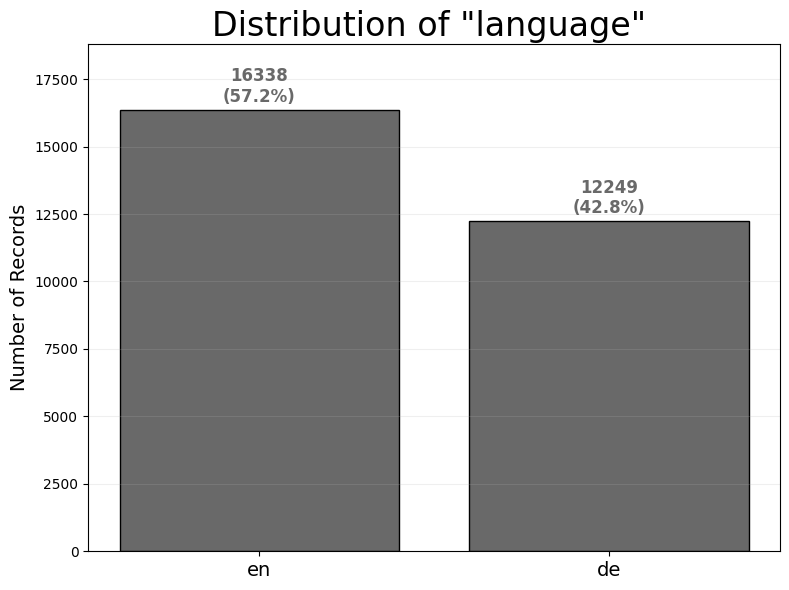

In [ ]:
# Let's analyze the distribution of "language" col
get_col_overview(df, 'language')
plot_col_distribution(df, 'language', rotation_xticks= 0, fontsize_xticks= 14)


Overview of the 'tag_1' column:
# of entries: 28587
# of null entries: 0
% of null entries: 0.00%


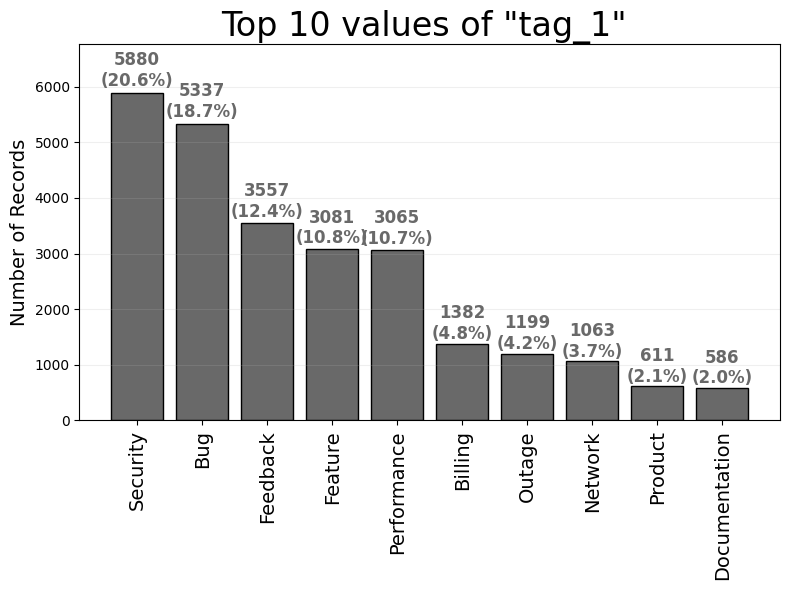

In [ ]:
# Let's analyze the distribution of "tag_1" col
get_col_overview(df, 'tag_1')
plot_col_distribution(df, 'tag_1', rotation_xticks= 90, fontsize_xticks= 14, top_n= 10)

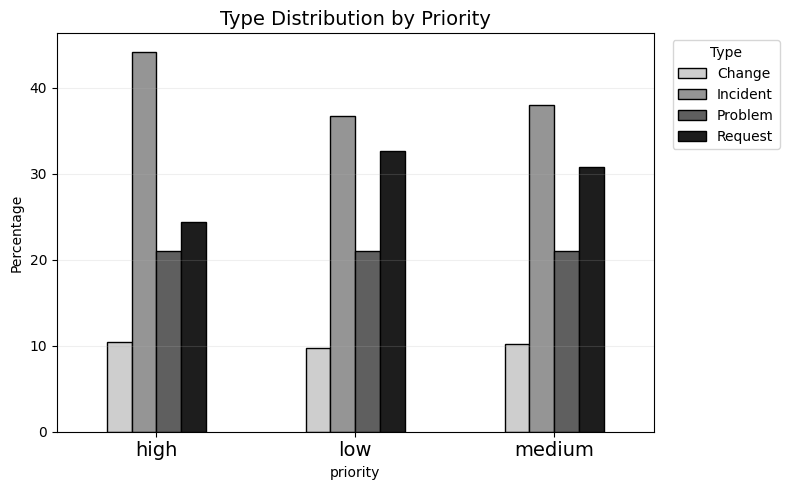

In [ ]:
# let's check how the "type" col is distributed by priority
plot_grouped_percentage_bar(df, 'priority', 'type', rotation_xticks= 0, fontsize_xticks= 14)

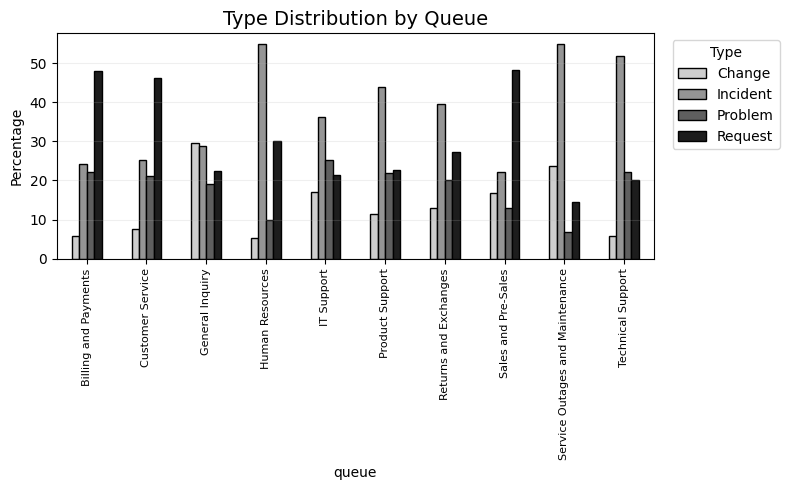

In [ ]:
# let's check how the "type" col is distributed by department
plot_grouped_percentage_bar(df, 'queue', 'type', rotation_xticks= 90, fontsize_xticks= 8)

---
# Text Preprocessing

In this section we performed a detailed text cleaning in order to prepare the dataset for NLP and machine learning models.  

### Text Preprocessing Strategy
1. We split the dataset into an english dataset and a german dataset to apply language-specific processing;
2. Using the Spacy library we loaded 2 pre-trained language models: one for English and one for German;
3. We defined a function which, given a text, perform the following steps:
- lowercases the text,
- removes the newline characters and the nametags e.g. <name>,
- removes punctuation and numbers
- tokenizes the text,
- removes stopwords,
- lemmatize the text levaraging POS tagging performed by Spacy
4. We create a two new column "text_combined" and "text_combined_cleaned" which are a combination of the subject text (if any) and the body text of the ticket
5. To avoid repeating the preprocessing step, which is time consuming, we check if a preprocessed dataset has already been created:
- if it has, then we load the file;
- if it has not been created, we preprocess the text and then we save it in a file.
6. To verify the quality of our operations we print a sample of cleaned text belonging to both datasets


In [ ]:
# check if the preprocessed file already exists, if so, load it, otherwise preprocess the data
preprocessed_file_name = "preprocessed_df.csv"
if os.path.exists(preprocessed_file_name):
    print(f"\nThe preprocessed file '{preprocessed_file_name}' already exists. Loading it...")
    df = pd.read_csv(preprocessed_file_name)
    print(f"The preprocessed file '{preprocessed_file_name}' has been loaded.")
else:
    print(f"\nPreprocessing the data...")

    # In order to preprocess the text, since there are 2 different languages, we need to split the dataset into tickets in German and English
    df_en = df[df["language"] == "en"].reset_index(drop=True)
    df_de = df[df["language"] == "de"].reset_index(drop=True)

    # set the tqdm pandas extension to show progress bars
    tqdm.pandas()

    # load the spacy models for English and German
    nlp_en = spacy.load("en_core_web_md")
    nlp_de = spacy.load("de_core_news_md")

    def preprocess_text(text, language):
        """
        This function takes a text and a language as input and returns the preprocessed text.
        """

        # if the text is NaN, return NaN
        if not isinstance(text, str):
            return np.nan

        text = text.lower() # lowercase text
        text= text.replace('\n', ' ') # replace new lines with spaces
        text = re.sub(r"<.*?>", "", text) # remove nametags
        text = re.sub(f"[{string.punctuation}]", "", text) # remove punctuation
        text = re.sub(r'\d+', '', text) # remove numbers

        # select the model based on the language
        if language == "en":
            doc = nlp_en(text)
        elif language == "de":
            doc = nlp_de(text)

        # remove stopwords and lemmatize
        tokens = [ token.lemma_ for token in doc
                if not token.is_stop and not token.is_punct and not token.is_space]

        return " ".join(tokens)

    # let's apply the preprocessing function to the text columns in the English dataset
    df_en["subject_cleaned"] = df_en["subject"].progress_apply(lambda x: preprocess_text(x, "en"))
    df_en["body_cleaned"] = df_en["body"].progress_apply(lambda x: preprocess_text(x, "en"))
    df_en["answer_cleaned"] = df_en["answer"].progress_apply(lambda x: preprocess_text(x, "en"))

    # let's apply the preprocessing function to the text columns in the German dataset
    df_de["subject_cleaned"] = df_de["subject"].progress_apply(lambda x: preprocess_text(x, "de"))
    df_de["body_cleaned"] = df_de["body"].progress_apply(lambda x: preprocess_text(x, "de"))
    df_de["answer_cleaned"] = df_de["answer"].progress_apply(lambda x: preprocess_text(x, "de"))

    # join the cleaned datasets and shuffle them
    df = pd.concat([df_en, df_de], ignore_index=True)
    df = df.sample(frac=1, random_state=45).reset_index(drop=True)

    # combine the subject (if any) and body in a new col
    df["text_combined"] = df.apply(
        lambda row: (
            f"{str(row['subject']).strip()}. {str(row['body']).strip()}"
            if pd.notna(row["subject"]) else
            str(row["body"]).strip()), axis=1)
    df["text_combined"] = df["text_combined"].str.replace(r'\s+', ' ', regex=True).str.strip()

    # combine the cleaned subject (if any) and the cleaned body in a new col
    df["text_combined_cleaned"] = df.apply(
        lambda row: (
            f"{str(row['subject_cleaned']).strip()} {str(row['body_cleaned']).strip()}"
            if pd.notna(row["subject_cleaned"]) else
            str(row["body_cleaned"]).strip()), axis=1)
    df["text_combined_cleaned"] = df["text_combined_cleaned"].str.replace(r'\s+', ' ', regex=True).str.strip()

    # save the preprocessed dataset as a CSV file
    df.to_csv(preprocessed_file_name, index=False)

    print(f"\nThe text has been preprocessed.")
    print(f"The preprocessed file '{preprocessed_file_name}' has been saved.")



The preprocessed file 'preprocessed_df.csv' already exists. Loading it...
The preprocessed file 'preprocessed_df.csv' has been loaded.


In [ ]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,subject_cleaned,body_cleaned,answer_cleaned,text_combined_cleaned,text_combined
0,Issue with Analytics-Dashboard,Analytics-Dashboard updates metrics.,Investigate the issue with the Analytics-Dashb...,Incident,Product Support,low,de,Bug,Issue With Analyticsdashboard,Analyticsdashboard Updates Metrics,investigate -- Issue with the Analyticsdashboa...,Issue With Analyticsdashboard Analyticsdashboa...,Issue with Analytics-Dashboard. Analytics-Dash...
1,Digitale Kampagnen schneiden plattformübergrei...,"Sehr geehrter Kundenservice, ich wende mich be...","<name>, ich helfe Ihnen gern bei der Fehlerbeh...",Problem,Technical Support,high,de,"Performance,Disruption,Outage,Support,Integration",digital Kampagne schneiden plattformübergreifend,geehrt Kundenservice wenden bezüglich schlecht...,helfen Fehlerbehebung digital Kampagne gerne A...,digital Kampagne schneiden plattformübergreife...,Digitale Kampagnen schneiden plattformübergrei...
2,Seek Expertise for Enhancing Marketing Strategies,"Customer Support, Lately, our marketing initia...","Dear [name], thank you for reaching out to our...",Incident,Product Support,medium,en,Feedback,seek expertise enhance marketing strategy,customer support lately marketing initiative e...,dear thank reach customer support team underst...,seek expertise enhance marketing strategy cust...,Seek Expertise for Enhancing Marketing Strateg...
3,Problems with Data Integration in Financial An...,We are facing challenges with data integration...,"Dear customer, we apologize for the issues you...",Problem,Technical Support,high,en,Bug,problem datum integration financial analysis t...,face challenge datum integration financial ana...,dear customer apologize issue experience datum...,problem datum integration financial analysis t...,Problems with Data Integration in Financial An...
4,IT-Consulting,authorized access detected,"Dear <name>, we take the security of our syste...",Incident,Product Support,medium,de,IT,Itconsulting,Authorized access detected,dear we take -- security -- our systems seriou...,Itconsulting Authorized access detected,IT-Consulting. authorized access detected


In [ ]:
# English sample
df_en = df[df["language"] == "en"]
print("English Ticket sample:")
print("Original subject:", df_en.iloc[0]["subject"])
print("Cleaned subject:", df_en.iloc[0]["subject_cleaned"])
print("\nOriginal body:", df_en.iloc[0]["body"])
print("Cleaned body:", df_en.iloc[0]["body_cleaned"])
print("\nOriginal answer:", df_en.iloc[0]["answer"])
print("Cleaned answer:", df_en.iloc[0]["answer_cleaned"])

print("\n" + "-"*80 + "\n")

# German sample
df_de = df[df["language"] == "de"]
print("German Ticket sample:")
print("Original subject:", df_de.iloc[0]["subject"])
print("Cleaned subject:", df_de.iloc[0]["subject_cleaned"])
print("\nOriginal body:", df_de.iloc[0]["body"])
print("Cleaned body:", df_de.iloc[0]["body_cleaned"])
print("\nOriginal answer:", df_de.iloc[0]["answer"])
print("Cleaned answer:", df_de.iloc[0]["answer_cleaned"])

English Ticket sample:
Original subject: Seek Expertise for Enhancing Marketing Strategies
Cleaned subject: seek expertise enhance marketing strategy

Original body: Customer Support, Lately, our marketing initiatives have become less effective, which has negatively affected our brand's visibility growth. This may be due to our outdated digital strategies and ineffective product promotions. Despite our efforts to refine our social media campaigns and optimize ad placements, the results have not been satisfactory. Our team has explored various methods, including content creation and influencer partnerships, and we have observed an increase in engagement and conversions. We are now reaching out to seek expert guidance on how to revamp our marketing strategy to improve our overall performance.
Cleaned body: customer support lately marketing initiative effective negatively affect brand visibility growth outdated digital strategy ineffective product promotion despite effort refine social me

# OpenAI Embeddings
In this section we transformed the textual data into semantic vectors using the embedding model provided by OpenAI API.
### Embedding Workflow
1. Reusability Check: we check whether a file containing the embeddings already exists, if so then we avoid to use the API again. This is important to optimize time and the API usage.
2. We then prepared the text for the API call and we stored it in the new col 'openai_text'
3. Then, for each ticket, we call the 'text-embedding-3-large' model of OpenAI to compute the embedding
4. We stored the results in the new col 'openai_embedding'
5. Finally we saved the final dataset with the embeddings in a .parquet file for fast loading in future sessions (-> to avoid reusing the API)

**Warning**: The embedding process is performed using OpenAI's “text-embedding-3-large” model. The api key is not included in the code for security reasons, and therefore code cells belonging to this “OpenAI Embeddings” section cannot be re-executed unless a valid api key is specified as an environment variable.


In [ ]:
# check if the df file with the openai embeddings already exists, if so, load it, otherwise use the OpenAI API to get the embeddings
df_openai_name = "df_openai.parquet"
if os.path.exists(df_openai_name):
    print(f"\nDataset with OpenAI embeddings '{df_openai_name}' already exists. Loading it...")
    df = pd.read_parquet(df_openai_name)
    print(f"Dataset with OpenAI embeddings '{df_openai_name}' has been loaded.")
else:
    print(f"\nUsing the OpenAI API to embed all tickets...")

    # load the environment variables from the .env file
    load_dotenv()

    # store the OpenAI API key in an environment variable
    api_key = os.getenv("OPENAI_API_KEY")

    def openai_embedding_preprocess_text(row):
        """
        This function takes a row of the dataframe and preprocesses the text for OpenAI embeddings.
        """
        text= row["text_combined"].replace('\n', ' ') # replace new lines with spaces
        text = re.sub(r"<.*?>", "", text) # remove nametags
        text= " ".join(text.split()) #remove extra spaces

        return text

    # create a new col with the preprocessed text for OpenAI embeddings
    df['openai_text'] = df.apply(lambda row: openai_embedding_preprocess_text(row), axis=1)

    client = OpenAI()
    def get_openai_embedding(text, model="text-embedding-3-large"):
        """
        This function takes a text and a model name as input and returns the OpenAI embeddings for that text.
        """
        try:
            response = client.embeddings.create(input=text, model=model)
            return response.data[0].embedding
        except Exception as e:
            print(f"Error while getting embeddings: {e}")
            return None

    # get the OpenAI embeddings for each row in the dataframe
    df['openai_embedding'] = df['openai_text'].progress_apply(get_openai_embedding)

    # save the dataset with the new embedding col as a CSV file
    df.to_parquet(df_openai_name, index=False)

    print(f"\nAll tickets have been embedded.")
    print(f"File '{df_openai_name}' has been saved.")



Dataset with OpenAI embeddings 'df_openai.parquet' already exists. Loading it...
Dataset with OpenAI embeddings 'df_openai.parquet' has been loaded.


In [ ]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,subject_cleaned,body_cleaned,answer_cleaned,text_combined_cleaned,text_combined,openai_text,openai_embedding
0,Issue with Analytics-Dashboard,Analytics-Dashboard updates metrics.,Investigate the issue with the Analytics-Dashb...,Incident,Product Support,low,de,Bug,Issue With Analyticsdashboard,Analyticsdashboard Updates Metrics,investigate -- Issue with the Analyticsdashboa...,Issue With Analyticsdashboard Analyticsdashboa...,Issue with Analytics-Dashboard. Analytics-Dash...,Issue with Analytics-Dashboard. Analytics-Dash...,"[-0.04394055902957916, -0.024455193430185318, ..."
1,Digitale Kampagnen schneiden plattformübergrei...,"Sehr geehrter Kundenservice, ich wende mich be...","<name>, ich helfe Ihnen gern bei der Fehlerbeh...",Problem,Technical Support,high,de,"Performance,Disruption,Outage,Support,Integration",digital Kampagne schneiden plattformübergreifend,geehrt Kundenservice wenden bezüglich schlecht...,helfen Fehlerbehebung digital Kampagne gerne A...,digital Kampagne schneiden plattformübergreife...,Digitale Kampagnen schneiden plattformübergrei...,Digitale Kampagnen schneiden plattformübergrei...,"[0.00953036267310381, -0.04021165892481804, -0..."
2,Seek Expertise for Enhancing Marketing Strategies,"Customer Support, Lately, our marketing initia...","Dear [name], thank you for reaching out to our...",Incident,Product Support,medium,en,Feedback,seek expertise enhance marketing strategy,customer support lately marketing initiative e...,dear thank reach customer support team underst...,seek expertise enhance marketing strategy cust...,Seek Expertise for Enhancing Marketing Strateg...,Seek Expertise for Enhancing Marketing Strateg...,"[0.00277706072665751, -0.022013666108250618, -..."
3,Problems with Data Integration in Financial An...,We are facing challenges with data integration...,"Dear customer, we apologize for the issues you...",Problem,Technical Support,high,en,Bug,problem datum integration financial analysis t...,face challenge datum integration financial ana...,dear customer apologize issue experience datum...,problem datum integration financial analysis t...,Problems with Data Integration in Financial An...,Problems with Data Integration in Financial An...,"[-0.04524771496653557, -0.023931091651320457, ..."
4,IT-Consulting,authorized access detected,"Dear <name>, we take the security of our syste...",Incident,Product Support,medium,de,IT,Itconsulting,Authorized access detected,dear we take -- security -- our systems seriou...,Itconsulting Authorized access detected,IT-Consulting. authorized access detected,IT-Consulting. authorized access detected,"[-0.05174471065402031, 0.003895655507221818, 0..."


---
# Topic Modeling
In this section we performed topic modeling to uncover latent themes within the support tickets. This should be very useful for the business because it enables to:
- understand recurrent customer issues;
- improve routing and prioritization strategies.  
  
### Topic Modeling Workflow
1. We perform the topic modeling on the english tickets:
- LDA Topic Modeling using the Genism library and the previously cleaned text: we manually defined the number of topics (we tried several possibilities, we chose the one which we believe is most appropriate)
- Bertopic Modeling using the embeddings generated with the OpenAI API: we manially defined the min_cluster_size and min_samples (parameters of HDBSCAN).
2. We plot the coeherence score of each model
3. We used the OpenAI GPT-4.1 model for topic naming: we provided the model with the top n word of each topic, together with some example tickets and then we asked for a topic name.
4. We plotted a chart which shows which topics represent the highest volume of tickets and for topic the priority distribution.

**Warning**: The naming process of topics is performed using OpenAI's "gpt-4.1" model. The api key is not included in the code for security reasons, and therefore functions such as get_lda_topics_insights, get_bertopic_insights and plot_priority_distr_by_topic cannot be re-executed unless a valid api key is specified as an environment variable.


In [ ]:
# we decide to do topic modeling on the english dataset only
df_en = df[df["language"] == "en"].reset_index(drop=True)

# Let's define the functions that will be used for topic modeling
def tokenize_text(text):
    """
    This function takes a text as input and returns a list of tokens.
    """
    if not isinstance(text, str):
        return []
    return word_tokenize(text.lower())

def get_lda_topic_modeling(df, num_topics, SEED= 42):
    """
    This function takes a dataframe and the number of topics as input, it prints the coherence score and then it returns an LDA model, a dictionary, and a corpus.
    """

    # number of tickets in the dataset
    print(f"Performing LDA topic modeling on {df.shape[0]} tickets...")

    # get the list of texts from the cleaned text column
    tickets_text = df['text_combined_cleaned'].tolist()

    # tokenize the texts
    tokenized_tickets = [tokenize_text(text) for text in tickets_text]

    # create a dictionary containing the unique tokens and their frequencies
    dictionary = corpora.Dictionary(tokenized_tickets)
    dictionary.filter_extremes(no_below=15, no_above=0.5) # remove tokens that appear in less than 15 tickets or more than 50% of the documents

    # create a bag-of-words representation of the tickets
    corpus = [dictionary.doc2bow(text) for text in tokenized_tickets]

    # let's train the LDA model
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,  # number of topics to extract
        random_state= SEED,
        passes=10,  # number of passes over the corpus
        iterations=100,  # number of iterations for each pass
        alpha='auto',  # automatic setting for alpha
        eta='auto'  # automatic setting for eta
    )
    print(f"LDA model trained successfully with {num_topics} topics.")

    print(f"\nLabeling the tickets using the LDA topics...")
    # for each ticket, get the dominant topic
    doc_topics = []
    for bow in corpus:
        topic_dist = lda_model.get_document_topics(bow)
        dominant_topic = max(topic_dist, key=lambda x: x[1])[0] +1 # +1 to make the topic IDs start from 1 instead of 0
        doc_topics.append(dominant_topic)
    # add the dominant topic to the dataframe
    df_with_topics = df.copy()
    df_with_topics['lda_topic'] = doc_topics
    print(f"Tickets labeled with LDA topics successfully.")

    # compute the coherence score for the LDA model
    coherence_lda= CoherenceModel(model=lda_model, texts=tokenized_tickets, dictionary=dictionary, coherence='c_v').get_coherence()
    print(f"\nCoherence Score (LDA - c_v): {coherence_lda:.4f}")

    return lda_model, dictionary, corpus, df_with_topics

def get_bertopic_topic_modeling(df, min_cluster_size= 1000, min_samples=1000):
    """
    This function takes a dataframe, min_cluster_size and min_samples as input, it prints the coherence score and then it returns a Bertopic model and a dataset with the assigned topics.
    """

    # number of tickets in the dataset
    print(f"Performing Bertopic topic modeling on {df.shape[0]} tickets...")

    # get the list of texts from the cleaned text column and the OpenAI embeddings
    tickets_text = df['text_combined_cleaned'].tolist()
    embeddings= df_en['openai_embedding'].tolist()

    # create a BERTopic model
    hdbscan_model = HDBSCAN(min_cluster_size= min_cluster_size, min_samples=min_samples)
    topic_model = BERTopic(hdbscan_model= hdbscan_model)

    # fit the model to the texts and embeddings
    topics, probs = topic_model.fit_transform(tickets_text, np.array(embeddings))

    # number of topics extracted
    num_topics = len(set(topics)) - (1 if -1 in topics else 0)  # exclude outliers (-1)

    print(f"Bertopic model trained successfully with {num_topics} topics.")

    print(f"\nLabeling the tickets using the Bertopic topics...")
    df["openai_bertopic"] = topics
    df["openai_bertopic"] = [t + 1 if t != -1 else -1 for t in topics] # # +1 to make the topic IDs start from 1 instead of 0
    print(f"Tickets labeled with Bertopic topics successfully.")

    # compute the coherence score for the BERTopic model
    tokenized_tickets = [tokenize_text(text) for text in tickets_text]
    dictionary= Dictionary(tokenized_tickets)
    topic_words = [[word for word, _ in topic_model.get_topic(i)] for i in topic_model.get_topics().keys()]
    coherence_bertopic = CoherenceModel(topics=topic_words, texts=tokenized_tickets, dictionary=dictionary, coherence='c_v').get_coherence()
    print(f"\nCoherence Score (BERTopic - c_v): {coherence_bertopic:.4f}")

    return df, topic_model

def get_lda_topics_insights(df_with_topics, lda_model, corpus, num_words= 10, num_ticket_examples= 3):
    """
    This function takes a dataframe, an LDA model, and a corpus as input and prints insights about the topics extracted by the LDA model.
    It also returns a dictionary with the topic labels generated with the OpenAI API.
    """

    total_tickets = len(corpus) # total number of tickets
    topic_labels= {} # dictionary to store the topic labels

    # grouo tickets by topic
    topic_to_docs= df_with_topics.groupby('lda_topic').indices

    # print insights for each topic
    for topic_id in sorted(topic_to_docs.keys()):
        print(f"\n-- -- -- Topic {topic_id} -- -- --")

        # get the top n words for the topic
        n_top_words = [word for word, _ in lda_model.show_topic(topic_id-1, num_words)] # -1 because the topic IDs start from 1 in our labeling

        # get some examples of tickets for the topic
        examples= df_with_topics[df_with_topics['lda_topic'] == topic_id]['body'].sample(10).tolist()

        # let's generate a descriptive name for the topic using the OpenAI API and print it
        topic_name = get_openai_topic_name(topic_id, n_top_words, examples)
        topic_labels[topic_id] = topic_name  # store the topic name in the dictionary

        # print the topic name and the top words
        print(f"OpenAI Topic Name: {topic_name}")
        print(f"Top {num_words} words:", [word for word in n_top_words])

        # get the tickets associated with the topic and the percetage of tickets in this topic
        num_tickets = len(topic_to_docs[topic_id])
        percentage = (num_tickets / total_tickets) * 100
        print(f"Number of tickets in this topic: {num_tickets} ({percentage:.2f}%)")

        # print num_ticket_examples of that topic
        print("\nExamples of tickets:")
        for i, ex in enumerate(examples[:num_ticket_examples]):
            print(f"SAMPLE {i+1}.  {ex.strip()[:300]} ...")

    return topic_labels

def get_bertopic_insights(df_with_topics, topic_model, num_words=10, num_ticket_examples=3):
    """
    This function takes a dataframe, an Bertopic model, and a corpus as input and prints insights about the topics extracted by the Bertopic model.
    It also returns a dictionary with the topic labels generated with the OpenAI API.
    """
    total_tickets = len(df_with_topics) # total number of tickets
    topic_labels= {} # dictionary to store the topic labels

    # get the topics from the BERTopic model excluding the outliers (-1)
    valid_topics= sorted([t for t in df_with_topics["openai_bertopic"].unique() if t != -1])

    # print insights for each topic
    for topic_id in valid_topics:
        print(f"\n-- -- -- Topic {topic_id} -- -- --")

        # get the top n words for the topic
        topic_words = topic_model.get_topic(topic_id-1)[:num_words]
        n_top_words = [w for w, _ in topic_words]

        # get some examples of tickets for the topic
        examples= df_with_topics[df_with_topics['openai_bertopic'] == topic_id]['body'].sample(10).tolist()

        # let's generate a descriptive name for the topic using the OpenAI API and print it
        topic_name = get_openai_topic_name(topic_id, n_top_words, examples)
        topic_labels[topic_id] = topic_name  # store the topic name in the dictionary

        # print the topic name and the top words
        print(f"OpenAI Topic Name: {topic_name}")
        print(f"Top {num_words} words:", [word for word in n_top_words])

        # get the tickets associated with the topic and the percetage of tickets in this topic
        num_tickets = len(df_with_topics[df_with_topics['openai_bertopic'] == topic_id])
        percentage = (num_tickets / total_tickets) * 100
        print(f"Number of tickets in this topic: {num_tickets} ({percentage:.2f}%)")

        # print num_ticket_examples of that topic
        print("\nExamples of tickets:")
        for i, ex in enumerate(examples[:num_ticket_examples]):
            print(f"SAMPLE {i+1}.  {ex.strip()[:300]} ...")

    return topic_labels

def visualize_lda_model(lda_model, corpus, dictionary):
    """
    This function visualizes the LDA model using pyLDAvis.
    """
    # prepare the visualization
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

    # display the visualization
    pyLDAvis.enable_notebook()
    pyLDAvis.display(vis)

    return vis

def plot_priority_distr_by_topic(df_with_topics, title, topic_labels, topic_col= 'lda_topic'):
    """
    This function takes a dataframe with topics, a title, and a dictionary of topic labels,
    and creates a bar plot showing the distribution of tickets by topic and priority.
    """

    # get the counts of tickets by topic
    total= len(df_with_topics)  # total number of tickets
    topic_counts = df_with_topics['lda_topic'].value_counts().sort_index() # count of tickets per topic
    topic_percents = (topic_counts / total) * 100  # percentage of tickets per topic

    # get the counts of tickets by topic and priority
    priority_counts_by_topic = df_with_topics.groupby([topic_col, 'priority']).size().unstack(fill_value=0)
    priority_perc_by_topic= priority_counts_by_topic.div(priority_counts_by_topic.sum(axis=1), axis=0) * 100

    #create labels for the topics,
    topic_labels = [f"Topic\n{topic_labels.get(i, f'ID {i}')}\n({topic_percents[i]:.1f}%)" for i in priority_counts_by_topic.index]

    # x positions for the bars
    x = np.arange(len(topic_labels))
    width = 0.30  # width of the bars

    # colors palette
    colors = {
        'low': 'green',
        'medium': 'orange',
        'high': 'red'
    }
    alpha = 0.6

    # create the bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, priority in enumerate(['low', 'medium', 'high']):
        percentages = priority_perc_by_topic[priority].values
        counts = priority_counts_by_topic[priority].values

        # position bars grouped by topic
        positions = x + (i - 1) * width
        bars = ax.bar(positions, percentages, width=width, color=colors[priority],
                      alpha=alpha, label=priority.capitalize())

        # label the bars with counts and percentages
        for bar, count, perc in zip(bars, counts, percentages):
            label = f'{int(count)}\n({perc:.1f}%)'
            ax.text( bar.get_x() + bar.get_width() / 2, bar.get_height() + (bar.get_height() * 0.01), label,
                  ha='center', va='bottom', fontsize=12, color='dimgray', fontweight='bold')

    # add titles and labels
    ax.set_xticks(x)
    plt.xticks(rotation=0, ha='center', fontsize=8)
    ax.set_xticklabels(topic_labels)
    ax.set_ylabel("Percentage of Tickets %")
    ax.set_title(title, fontsize=20)
    ax.set_ylim(0, 100)
    ax.legend(title="Priority")
    plt.tight_layout()
    plt.show()

def get_openai_topic_name(topic_id, top_words, examples, model= "gpt-4.1"):
    """
    This function takes a topic ID, a list of top words for that topic, and a list of example tickets as input,
    and returns a descriptive name for the topic using the OpenAI API.
    """

    # load the environment variables from the .env file
    load_dotenv()

    # create the prompt for the OpenAI API
    prompt= f""" You are an expert in topic modeling and natural language processing. Your task is to assign a short, descriptive name to a topic extracted by an LDA model.
              Topic ID: {topic_id} has the following top words: {', '.join(top_words)}.
              Here are some examples of tickets that belong to this topic: {chr(10).join([f"- {example}" for example in examples])}
              Give a clear and concise name (max 5 words) that summarizes what this topic is about.
              Only return the name.
            """

    client= OpenAI(api_key=os.getenv("OPENAI_API_KEY")) # create the OpenAI client

    # make the API call to get the topic name
    response = client.chat.completions.create(model=model,
                                              messages=[{"role": "user", "content": prompt}])

    return response.choices[0].message.content.strip()

## Topic Modeling with LDA

In [ ]:
# let's perform LDA topic modeling on the English dataset
lda_model, dictionary, corpus, df_with_topics = get_lda_topic_modeling(df_en, num_topics= 4, SEED= SEED)

# let's visualize the topics extracted by the LDA model
visualize_lda_model(lda_model, corpus, dictionary) #numbers in the visualization are not the same as the topic IDs we assigned (don't look at them)

Performing LDA topic modeling on 16338 tickets...
LDA model trained successfully with 4 topics.

Labeling the tickets using the LDA topics...
Tickets labeled with LDA topics successfully.

Coherence Score (LDA - c_v): 0.6707


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.084736 -0.102241       1        1  40.654354
3     -0.119218 -0.174711       2        1  27.900543
2      0.253446  0.102616       3        1  18.432218
1     -0.218964  0.174335       4        1  13.012885, topic_info=          Term         Freq        Total Category  logprob  loglift
89    security  6033.000000  6033.000000  Default  30.0000  30.0000
9      digital  4711.000000  4711.000000  Default  29.0000  29.0000
26   marketing  4205.000000  4205.000000  Default  28.0000  28.0000
79     medical  4506.000000  4506.000000  Default  27.0000  27.0000
46    strategy  4244.000000  4244.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
47     support  1026.955409  8159.691183   Topic4  -4.2507  -0.0334
68  assistance   932.780391  6599.859985   Topic4  -4.3469   0.0826
67  appreciate   728.249262  5767.120422   Topic4  -4.5944  -0.0301
64      update   537.886394  6689.477426   Topic4  -4.8974  -0.4814
60      recent   442.296674  3193.148690   Topic4  -5.0931   0.0624

[288 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
102       1  0.198064         access
102       2  0.000601         access
102       3  0.801273         access
0         4  0.999416             ad
65        2  0.904035   additionally
...     ...       ...            ...
49        4  0.997023     visibility
556       3  0.998470  vulnerability
417       1  0.066319        website
417       4  0.931953        website
994       2  0.992965           zoho

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [ ]:
# Get insights about the topics extracted by the LDA model
topic_labels= get_lda_topics_insights(df_with_topics, lda_model, corpus, num_words= 10, num_ticket_examples= 3)


-- -- -- Topic 1 -- -- --
OpenAI Topic Name: Technical Issue Resolution Requests
Top 10 words: ['issue', 'problem', 'resolve', 'update', 'software', 'system', 'datum', 'restart', 'recent', 'assistance']
Number of tickets in this topic: 7011 (42.91%)

Examples of tickets:
SAMPLE 1.  The analytics dashboard is currently showing incorrect investment data, which is impacting our decision-making process. This issue might have arisen from a recent software update. Despite trying to revert to previous versions and checking data integrations, the problem still persists. We would great ...
SAMPLE 2.  detail of the issue ...
SAMPLE 3.  Reporting an issue with the processing of investment data for the financial firm. We're facing delays, likely due to system overload. Our team tried rebooting the system and refreshing the data, but the problem remains. We are worried about the potential impact on operations and would be grateful fo ...

-- -- -- Topic 2 -- -- --
OpenAI Topic Name: Digital Market

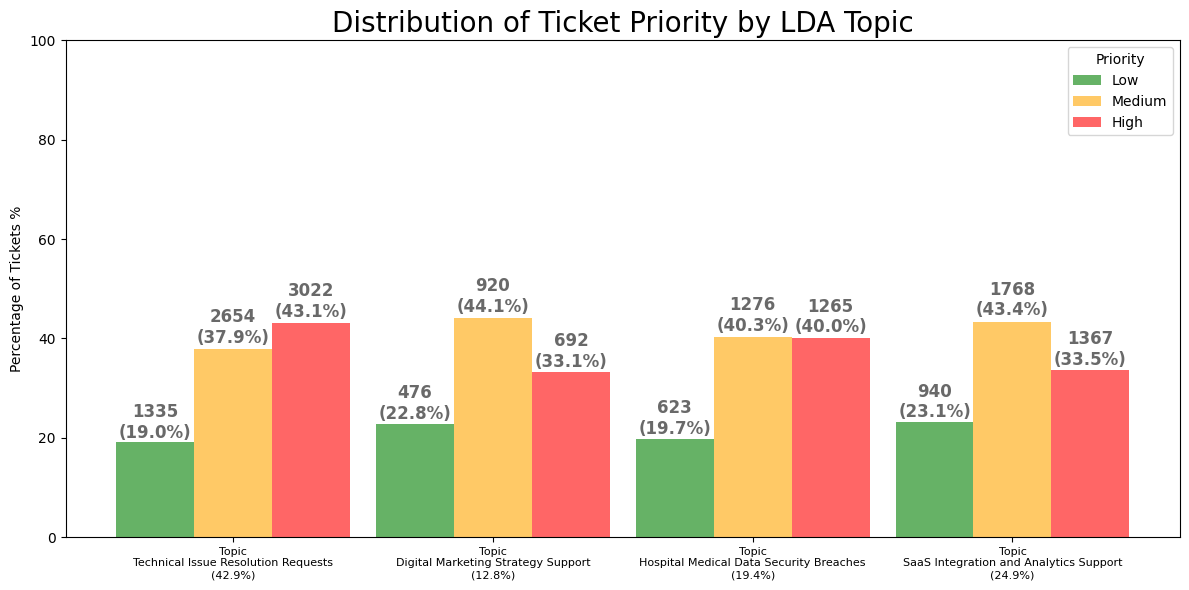

In [ ]:
# Plot the distribution of ticket priority by topic using the topic labels generated by OpenAI
plot_priority_distr_by_topic(df_with_topics, title= "Distribution of Ticket Priority by LDA Topic", topic_labels= topic_labels, topic_col= 'lda_topic')

## Topic Modeling with OpenAI Embeddings

In [ ]:
# let's perform Bertopic topic modeling on the English dataset
df_with_topics, bertopic_model = get_bertopic_topic_modeling(df_with_topics, min_cluster_size= 1000, min_samples=1000)

Performing Bertopic topic modeling on 16338 tickets...
Bertopic model trained successfully with 4 topics.

Labeling the tickets using the Bertopic topics...
Tickets labeled with Bertopic topics successfully.

Coherence Score (BERTopic - c_v): 0.7625


In [ ]:
# How many outliers tickets are there? (Bertopic assigns -1 to outliers which are not assigned to any topic)
print("Outlier (%):", round((df_with_topics["openai_bertopic"] == -1).mean() * 100,2))

Outlier (%): 4.35


In [ ]:
# Get insights about the topics extracted by the Bertopic model
topic_labels= get_bertopic_insights(df_with_topics, topic_model= bertopic_model, num_words= 10, num_ticket_examples= 3)


-- -- -- Topic 1 -- -- --
OpenAI Topic Name: Software Issues and Support Requests
Top 10 words: ['issue', 'problem', 'resolve', 'software', 'update', 'restart', 'recent', 'assistance', 'cause', 'campaign']
Number of tickets in this topic: 7155 (43.79%)

Examples of tickets:
SAMPLE 1.  Recently, the project management tools have been experiencing unresponsiveness, which has disrupted our team's collaborative workflow. This may be due to recent software updates or integration issues. After attempting to restart devices and clear cache, the problem still persists. Our team is strugg ...
SAMPLE 2.  Dear Customer Support, we have noted a considerable decrease in our online engagement metrics over the past week. This may be due to recent algorithm changes on social media platforms. We have attempted to adjust our content strategy, which has shown some improvements, but we are still closely monit ...
SAMPLE 3.  Customer Support, composing a report about an issue with the marketing agency's d

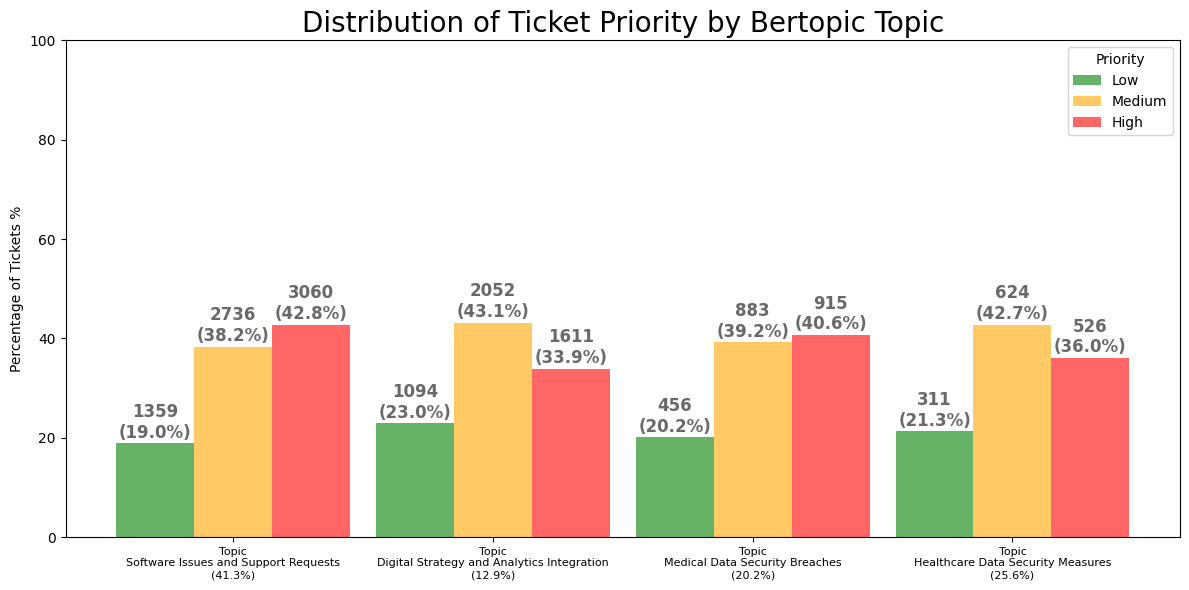

In [ ]:
# Plot the distribution of ticket priority by topic using the topic labels generated by OpenAI
df_with_topics_without_outliers = df_with_topics[df_with_topics['openai_bertopic'] != -1].reset_index(drop=True) # remove outliers before plotting
plot_priority_distr_by_topic(df_with_topics_without_outliers, title= "Distribution of Ticket Priority by Bertopic Topic", topic_labels= topic_labels, topic_col= "openai_bertopic")

---
# Ticket Priority Classification

In this section, we try to predict (in a supervised manner) the priority of each ticket based on its textual content and its subject.
The approach is to create different pipelines (vectorizer + classifier) and see which ones yield the best results, mainly in terms of accuracy.

#### Vectorizers

* *CountVectorizer*: simply creates a matrix where each row represents a document and each column a word. Each cell contains the number of times that word appears in the document.

* *TfidfVectorizer*: the approach is the same as *CountVectorizer*. However, instead of counts, the cells contain TFIDF (*Term Frequency Inverse Document Frequency*) scores that reduce the weight of the most frequent words in the documents and give more importance to the rarer ones.

* Word2Vec: transforms words into continuous numerical vectors so that semantically similar words have vectors close together in space. We used the pre-trained Google News model, which associates each word with a vector of 600 values.

* OpenAI: is a more powerful pre-trained embedding model than Word2Vec, which associates each word with a vector of 3072 values.

#### Classifiers

* *MultinomialNB*: Assuming that words are independent of each other (naive), this classifier calculates the probability of a ticket belonging to each priority and chooses the one with the highest probability using Bayes' theorem.

* *Logistic Regression*: calculates the probability that a ticket has a certain priority using the sigmoid function.

* *Random Forest*: builds many decision trees capable of reaching a decision, then the final class is chosen by majority vote.

* *Neural Network*: we chose a very simple two-layered NN with dropouts (0.3) and a regularizer (L2 = 0.03).

The parameters used in the vectorizers and classifiers are the result of several optimization attempts.

*Disclaimer: The analysis was conducted only on English-language tickets, since working with two languages at the same time especially disrupts the functioning of the early BoW vectorizers.*

In [ ]:
# we decide to do supervised classification on the english dataset only
df_en = df[df["language"] == "en"].reset_index(drop=True)


Overview of the 'priority' column:
# of entries: 16338
# of null entries: 0
% of null entries: 0.00%


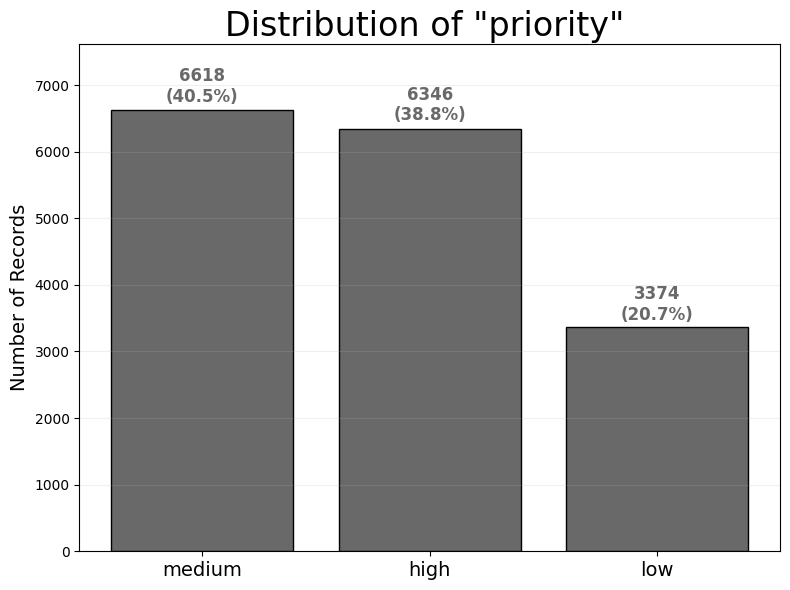

In [ ]:
# Let's analyze the distribution of "priority" col
get_col_overview(df_en, 'priority')
plot_col_distribution(df_en, 'priority', rotation_xticks= 0, fontsize_xticks= 14)

In [ ]:

# first split: train 70% and temporary set 30%
df_train, df_temp = train_test_split(
    df_en,
    test_size=0.30,
    stratify=df_en["priority"],
    random_state=42
)

# second split: validation 10% and test 20% → 10/30 = 1/3
df_valid, df_test = train_test_split(
    df_temp,
    test_size=2/3,
    stratify=df_temp["priority"],
    random_state=42
)

# let's check the sizes of the train, validation, and test sets
print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_valid)}")
print(f"Test set size: {len(df_test)}")
print(f"Total dataset size: {len(df_train) + len(df_valid) + len(df_test)} \n")

# let's check if stratification worked correctly
print(df_train['priority'].value_counts(normalize=True))
print(df_valid['priority'].value_counts(normalize=True))
print(df_test['priority'].value_counts(normalize=True))

# let's define the target variable
y_train = df_train["priority"]
y_valid = df_valid["priority"]
y_test = df_test["priority"]
# print the y shapes
print("\n")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"y_test shape: {y_test.shape}")

Train set size: 11436
Validation set size: 1634
Test set size: 3268
Total dataset size: 16338 

priority
medium    0.405037
high      0.388423
low       0.206541
Name: proportion, dtype: float64
priority
medium    0.405141
high      0.388617
low       0.206242
Name: proportion, dtype: float64
priority
medium    0.405141
high      0.388311
low       0.206548
Name: proportion, dtype: float64


y_train shape: (11436,)
y_valid shape: (1634,)
y_test shape: (3268,)


### Prepare Vectorizers

#### BoW (Bag of Words)

In [ ]:
# let's initialize the CountVectorizer wich will convert the text into a bag-of-words representation
vectorizer = CountVectorizer(max_df=0.85)

# let's fit it to the training data
X_train_bow = vectorizer.fit_transform(df_train["text_combined_cleaned"])
# let's now transform the validation and test data
X_valid_bow = vectorizer.transform(df_valid["text_combined_cleaned"])
X_test_bow = vectorizer.transform(df_test["text_combined_cleaned"])

# let's check the shapes of the feature matrices
print(f"Shape of X_train_bow: {X_train_bow.shape}")
print(f"Shape of X_valid_bow: {X_valid_bow.shape}")
print(f"Shape of X_test_bow: {X_test_bow.shape}")

Shape of X_train_bow: (11436, 3735)
Shape of X_valid_bow: (1634, 3735)
Shape of X_test_bow: (3268, 3735)


#### TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
# let's initialize the TfidfVectorizer which will convert the text into a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_df=0.95)

# let's fit it to the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train["text_combined_cleaned"])
# let's now transform the validation and test data
X_valid_tfidf = tfidf_vectorizer.transform(df_valid["text_combined_cleaned"])
X_test_tfidf = tfidf_vectorizer.transform(df_test["text_combined_cleaned"])

# let's check the shapes of the feature matrices
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_valid_tfidf: {X_valid_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_tfidf: (11436, 3735)
Shape of X_valid_tfidf: (1634, 3735)
Shape of X_test_tfidf: (3268, 3735)


#### Word2Vec Embeddings

In [ ]:
# Load the Google News pre-trained Word2Vec model
w2v_model = api.load('word2vec-google-news-300')
NUM_FEATURES = 300

def max_feature_vector(words, model):
    """
    For each word in the input list, this function retrieves its vector from the model and returns the maximum vector.
    Which represents the most significant word in the input list.
    """
    feature_vec = np.zeros((NUM_FEATURES,), dtype='float32')
    for word in words:
        if word in model:
            feature_vec = np.maximum(feature_vec, model[word])
    return feature_vec

def avg_feature_vector(words, model):
    """
    For each word in the input list, this function retrieves its vector from the model and returns the average vector.
    Which represents the average significance of the sentence.
    """
    feature_vec = np.zeros((NUM_FEATURES,), dtype='float32')
    n_words = 0
    for word in words:
        if word in model:
            feature_vec = np.add(feature_vec, model[word])
            n_words += 1
    return feature_vec / n_words if n_words > 0 else feature_vec

def max_avg_feature_vector(words, model):
    """
    Combines the maximum and average feature vectors for a list of words.
    """
    return np.concatenate((max_feature_vector(words, model), avg_feature_vector(words, model)),axis=0)

# let's get the maximum average feature vector for each text in the training, validation, and test sets
X_train_w2v = np.array([max_avg_feature_vector(text.split(), w2v_model) for text in df_train["text_combined_cleaned"]])
X_valid_w2v = np.array([max_avg_feature_vector(text.split(), w2v_model) for text in df_valid["text_combined_cleaned"]])
X_test_w2v = np.array( [max_avg_feature_vector(text.split(), w2v_model) for text in df_test["text_combined_cleaned"]])

# let's check the shapes of the feature matrices
print(f"Shape of X_train_w2v: {X_train_w2v.shape}")
print(f"Shape of X_valid_w2v: {X_valid_w2v.shape}")
print(f"Shape of X_test_w2v: {X_test_w2v.shape}")

Shape of X_train_w2v: (11436, 600)
Shape of X_valid_w2v: (1634, 600)
Shape of X_test_w2v: (3268, 600)


#### OpenAI Embeddings

In [ ]:
# FOURTH TYPE OF FEATURE EXTRACTION: OpenAI Embeddings

# let's get the OpenAI embeddings for the training, validation, and test sets
X_train_openai = np.array(df_train['openai_embedding'].tolist())
X_valid_openai = np.array(df_valid['openai_embedding'].tolist())
X_test_openai = np.array(df_test['openai_embedding'].tolist())

# let's check the shapes of the feature matrices
print(f"Shape of X_train_openai: {X_train_openai.shape}")
print(f"Shape of X_valid_openai: {X_valid_openai.shape}")
print(f"Shape of X_test_openai: {X_test_openai.shape}")

Shape of X_train_openai: (11436, 3072)
Shape of X_valid_openai: (1634, 3072)
Shape of X_test_openai: (3268, 3072)


## Predictions

In [ ]:
def get_model_performance_metrics(X_train, y_train, X_valid, y_valid, X_test, y_test, model, model_name, nn= False):
    """
    This function takes validation, and test sets, a model, and the model name as input,
    predicts the labels for the validation and test sets,
    and prints the performance metrics.
    """
    if nn == False: # if the model is not a neural network
        # predict labels for validation and test sets
        y_pred_valid = model.predict(X_valid) # predict the labels for the validation set
        y_pred_test = model.predict(X_test) # predict the labels for the test set
    if nn == True: # if the model is a neural network
        # predict labels for validation and test sets
        y_pred_valid = model.predict(X_valid, verbose= 0).argmax(axis=1)
        y_pred_test = model.predict(X_test, verbose= 0).argmax(axis=1)

    # print performance metrics
    print(f"""- {model_name} -
Accuracy Train Set: {accuracy_score(y_train, model.predict(X_train) if not nn else model.predict(X_train, verbose= 0).argmax(axis=1)):.2f}
Accuracy Validation Set: {accuracy_score(y_valid, y_pred_valid):.2f}
Accuracy Test Set: {accuracy_score(y_test, y_pred_test):.2f}""")

    print(f"\nF1 Macro (Test): {f1_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"F1 Weighted (Test): {f1_score(y_test, y_pred_test, average='weighted'):.2f}")

    return

def plot_class_report_conf_matrix(X_test, y_test, model, model_name, nn=False, label_encoder=None):
    """
    This function takes the test set, a model, and the model name as input,
    predicts the labels for the test sets, and prints the classification report and plot the confusion matrix.
    """
    if nn == False: # if the model is not a neural network
        # predict labels for the test sets
        y_pred_test = model.predict(X_test) # predict the labels for the test set
    if nn == True: # if the model is a neural network
        # predict labels for the test sets
        y_pred_test = model.predict(X_test, verbose= 0).argmax(axis=1)
        y_pred_test = label_encoder.inverse_transform(y_pred_test)
        y_test = label_encoder.inverse_transform(y_test)

    # classification report
    print("\nClassification Report (Test set):")
    print(classification_report(y_test, y_pred_test))

    # confusion matrix
    label_order = ['low', 'medium', 'high']
    cm = confusion_matrix(y_test, y_pred_test, labels=label_order)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
    plt.title(f'Confusion Matrix | {model_name} | Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    return

def plot_nn_training_history(history, title):
    """
    This function takes the training history and a title as input and plots the training and validation loss and accuracy.
    """
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def train_naive_bayes_model(X_train, y_train, X_valid, y_valid, X_test, y_test, title= "Naive Bayes Model"):
    """
    This function trains a Naive Bayes model on the training set and evaluates it on the validation and test sets.
    """

    # initialize the model
    model = MultinomialNB()

    # fit the model to the training data
    model.fit(X_train, y_train)

    # evaluate the model
    get_model_performance_metrics(X_train, y_train, X_valid, y_valid, X_test, y_test, model, title)

    return model

def train_log_reg_model(X_train, y_train, X_valid, y_valid, X_test, y_test, title= "Logistic Regression Model", scale= False):
    """
    This function trains a Logistic Regression model on the training set and evaluates it on the validation and test sets.
    """
    if scale:
        # scale the data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test = scaler.transform(X_test)

    # initialize the model
    model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', C=0.1)

    # fit the model to the training data
    model.fit(X_train, y_train)

    # evaluate the model
    get_model_performance_metrics(X_train, y_train, X_valid, y_valid, X_test, y_test, model, title)

    return model

def train_random_forest_model(X_train, y_train, X_valid, y_valid, X_test, y_test, title= "Random Forest Model"):
    """
    This function trains a Random Forest model on the training set and evaluates it on the validation and test sets.
    """

    # initialize the model
    model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
    )

    # fit the model to the training data
    model.fit(X_train, y_train)

    # evaluate the model
    get_model_performance_metrics(X_train, y_train, X_valid, y_valid, X_test, y_test, model, title)

    return model

def train_neural_network_model(X_train, y_train, X_valid, y_valid, input_dim, title= "Neural Network Model"):
    """
    This function trains a Neural Network model on the training set and evaluates it on the validation and test sets.
    """

    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.03), input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))

    # keep in mind the class imbalances, so we use class_weight='balanced' in the model
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

    model.compile(optimizer=Adam(learning_rate= 4e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Callback: Reduce learning rate on plateau -> halves the learning rate if the validation loss does not improve for 2 epochs
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )

    # fit the model to the training data
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=10,
        batch_size=64,
        class_weight= class_weight_dict,
        callbacks=[reduce_lr],
        verbose=1
    )

    return model, history

### Naive Bayes Classifier
We  build 2 Naive Bayes classifiers: one for the BoW features and one for the TF-IDF features.  
We don't use the word2vec and openai embeddings for the Naive Bayes classifier, as they are not suitable for this algorithm.



In [ ]:
# NAIVE BAYES CLASSIFIER - Bag-of-Words features
nb_model_bow= train_naive_bayes_model(
    X_train_bow, y_train,
    X_valid_bow, y_valid,
    X_test_bow, y_test,
    title= "Naive Bayes Classifier on Bag-of-Words features"
)

- Naive Bayes Classifier on Bag-of-Words features -
Accuracy Train Set: 0.56
Accuracy Validation Set: 0.47
Accuracy Test Set: 0.48

F1 Macro (Test): 0.45
F1 Weighted (Test): 0.48


In [ ]:
# NAIVE BAYES CLASSIFIER - TF-IDF features
nb_model_tfidf= train_naive_bayes_model(
    X_train_tfidf, y_train,
    X_valid_tfidf, y_valid,
    X_test_tfidf, y_test,
    title= "Naive Bayes Classifier on TF-IDF features"
)

- Naive Bayes Classifier on TF-IDF features -
Accuracy Train Set: 0.55
Accuracy Validation Set: 0.48
Accuracy Test Set: 0.50

F1 Macro (Test): 0.39
F1 Weighted (Test): 0.45



Classification Report (Test set):
              precision    recall  f1-score   support

        high       0.51      0.56      0.54      1269
         low       0.36      0.31      0.33       675
      medium       0.50      0.48      0.49      1324

    accuracy                           0.48      3268
   macro avg       0.46      0.45      0.45      3268
weighted avg       0.47      0.48      0.48      3268



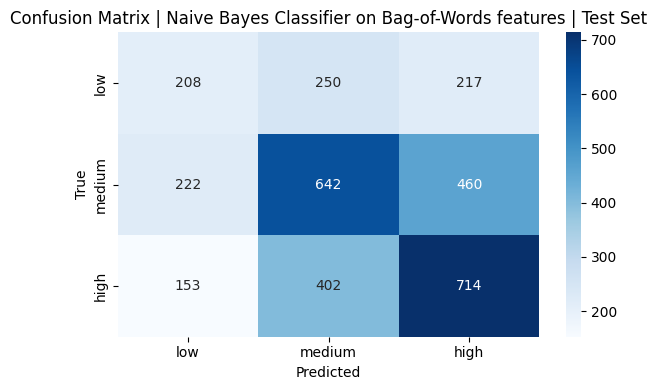

In [ ]:
# Print classification report and confusion matrix for the best input features (Bag-of-Words features) -> preferred for F1 score
plot_class_report_conf_matrix(X_test_bow, y_test, nb_model_bow, model_name= "Naive Bayes Classifier on Bag-of-Words features")

### Logistic Regression

In [ ]:
# LOGISTIC REGRESSION CLASSIFIER - Bag-of-Words features
log_reg_model_bow= train_log_reg_model(
    X_train_bow, y_train,
    X_valid_bow, y_valid,
    X_test_bow, y_test,
    title= "Logistic Regression Classifier on Bag-of-Words features",
)

- Logistic Regression Classifier on Bag-of-Words features -
Accuracy Train Set: 0.65
Accuracy Validation Set: 0.51
Accuracy Test Set: 0.52

F1 Macro (Test): 0.51
F1 Weighted (Test): 0.52


In [ ]:
# LOGISTIC REGRESSION CLASSIFIER - TF-IDF features
log_reg_model_tfidf= train_log_reg_model(
    X_train_tfidf, y_train,
    X_valid_tfidf, y_valid,
    X_test_tfidf, y_test,
    title= "Logistic Regression Classifier on TF-IDF features"
)

- Logistic Regression Classifier on TF-IDF features -
Accuracy Train Set: 0.54
Accuracy Validation Set: 0.48
Accuracy Test Set: 0.47

F1 Macro (Test): 0.47
F1 Weighted (Test): 0.48


In [ ]:
# LOGISTIC REGRESSION CLASSIFIER - Maximum Average Feature Vector features (w2v)
log_reg_model_w2v= train_log_reg_model(
    X_train_w2v, y_train,
    X_valid_w2v, y_valid,
    X_test_w2v, y_test,
    title= "Logistic Regression Classifier on w2v features",
    scale=True  #scale the vectorized features before training the model
)

- Logistic Regression Classifier on w2v features -
Accuracy Train Set: 0.54
Accuracy Validation Set: 0.46
Accuracy Test Set: 0.44

F1 Macro (Test): 0.44
F1 Weighted (Test): 0.45


In [ ]:
# LOGISTIC REGRESSION CLASSIFIER - OpenAI Embeddings features
log_reg_model_openai= train_log_reg_model(
    X_train_openai, y_train,
    X_valid_openai, y_valid,
    X_test_openai, y_test,
    title= "Logistic Regression Classifier on OpenAI Embeddings features",
    scale=True  #scale the vectorized features before training the model
)

- Logistic Regression Classifier on OpenAI Embeddings features -
Accuracy Train Set: 0.80
Accuracy Validation Set: 0.54
Accuracy Test Set: 0.54

F1 Macro (Test): 0.53
F1 Weighted (Test): 0.54



Classification Report (Test set):
              precision    recall  f1-score   support

        high       0.58      0.50      0.54      1269
         low       0.33      0.54      0.41       675
      medium       0.51      0.41      0.45      1324

    accuracy                           0.47      3268
   macro avg       0.47      0.48      0.47      3268
weighted avg       0.50      0.47      0.48      3268



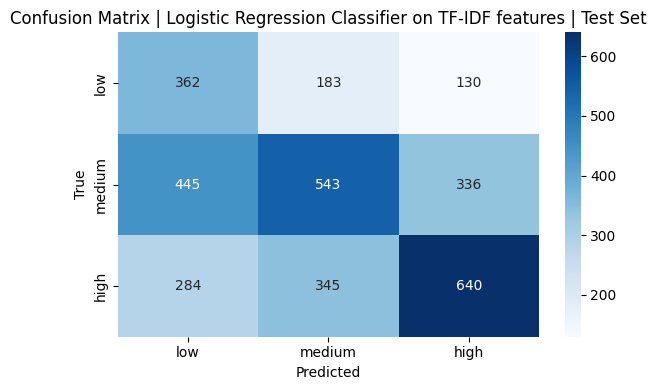

In [ ]:
# Print classification report and confusion matrix for the best input features (TF-IDF)
plot_class_report_conf_matrix(X_test_tfidf, y_test, log_reg_model_tfidf, model_name= "Logistic Regression Classifier on TF-IDF features")

### Random Forest Models

In [ ]:
# RANDOM FOREST CLASSIFIER - Bag-of-Words features
rf_model_bow= train_random_forest_model(
    X_train_bow, y_train,
    X_valid_bow, y_valid,
    X_test_bow, y_test,
    title= "Random Forest Classifier on Bag-of-Words features"
)

- Random Forest Classifier on Bag-of-Words features -
Accuracy Train Set: 0.62
Accuracy Validation Set: 0.51
Accuracy Test Set: 0.49

F1 Macro (Test): 0.48
F1 Weighted (Test): 0.49


In [ ]:
# RANDOM FOREST CLASSIFIER - TF-IDF features
rf_model_tfidf= train_random_forest_model(
    X_train_tfidf, y_train,
    X_valid_tfidf, y_valid,
    X_test_tfidf, y_test,
    title= "Random Forest Classifier on TF-IDF features"
)

- Random Forest Classifier on TF-IDF features -
Accuracy Train Set: 0.64
Accuracy Validation Set: 0.51
Accuracy Test Set: 0.49

F1 Macro (Test): 0.48
F1 Weighted (Test): 0.49


In [ ]:
# RANDOM FOREST CLASSIFIER - Maximum Average Feature Vector features (w2v)
rf_model_w2v= train_random_forest_model(
    X_train_w2v, y_train,
    X_valid_w2v, y_valid,
    X_test_w2v, y_test,
    title= "Random Forest Classifier on w2v features"
)

- Random Forest Classifier on w2v features -
Accuracy Train Set: 1.00
Accuracy Validation Set: 0.66
Accuracy Test Set: 0.67

F1 Macro (Test): 0.65
F1 Weighted (Test): 0.67


In [ ]:
# RANDOM FOREST CLASSIFIER - OpenAI Embeddings features
rf_model_openai= train_random_forest_model(
    X_train_openai, y_train,
    X_valid_openai, y_valid,
    X_test_openai, y_test,
    title= "Random Forest Classifier on OpenAI Embeddings features",
)

- Random Forest Classifier on OpenAI Embeddings features -
Accuracy Train Set: 1.00
Accuracy Validation Set: 0.64
Accuracy Test Set: 0.64

F1 Macro (Test): 0.61
F1 Weighted (Test): 0.63



Classification Report (Test set):
              precision    recall  f1-score   support

        high       0.58      0.50      0.54      1269
         low       0.36      0.54      0.43       675
      medium       0.51      0.44      0.47      1324

    accuracy                           0.49      3268
   macro avg       0.48      0.49      0.48      3268
weighted avg       0.50      0.49      0.49      3268



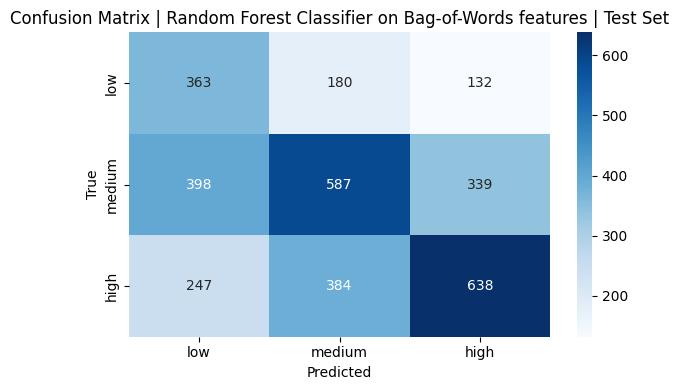

In [ ]:
# Print classification report and confusion matrix for the best input features (Bag-of-Words features)
plot_class_report_conf_matrix(X_test_bow, y_test, rf_model_bow, model_name= "Random Forest Classifier on Bag-of-Words features")

### Neural Networks

In [ ]:
# let's first encode the target variable
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_valid)
y_test_enc = le.transform(y_test)

# now we convert the encoded labels to categorical format for the neural network
y_train_cat = to_categorical(y_train_enc)
y_valid_cat = to_categorical(y_valid_enc)
y_test_cat = to_categorical(y_test_enc)

In [ ]:
# NEURAL NETWORK CLASSIFIER - Bag-of-Words features

# convert sparse to dense
X_train_bow_dense = X_train_bow.toarray().astype(np.float32)
X_valid_bow_dense = X_valid_bow.toarray().astype(np.float32)
X_test_bow_dense = X_test_bow.toarray().astype(np.float32)

# train the neural network model on Bag-of-Words features
nn_model_bow, history_bow = train_neural_network_model(
    X_train_bow_dense, y_train_cat,
    X_valid_bow_dense, y_valid_cat,
    input_dim=X_train_bow_dense.shape[1],
    title="Neural Network on Bag-of-Words"
)

get_model_performance_metrics(X_train_bow_dense, y_train_enc, X_valid_bow_dense, y_valid_enc, X_test_bow_dense, y_test_enc, nn_model_bow, "Neural Network on Bag-of-Words", nn=True)


Epoch 1/10


2025-05-29 19:08:45.881534: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-05-29 19:08:45.881998: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3877 - loss: 2.6854 - val_accuracy: 0.4621 - val_loss: 1.1189 - learning_rate: 4.0000e-04
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4164 - loss: 1.1139 - val_accuracy: 0.4461 - val_loss: 1.0883 - learning_rate: 4.0000e-04
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4349 - loss: 1.0855 - val_accuracy: 0.4725 - val_loss: 1.0754 - learning_rate: 4.0000e-04
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4602 - loss: 1.0771 - val_accuracy: 0.4774 - val_loss: 1.0751 - learning_rate: 4.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4616 - loss: 1.0714 - val_accuracy: 0.4884 - val_loss: 1.0748 - learning_rate: 4.0000e-04
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 1.0606 - val_accuracy: 0.4810 - val_loss: 1.0780 - learning_rate: 4.0000e-04
Epoch 7/10
160/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4907 - lo

2025-05-29 19:08:51.046469: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-05-29 19:08:51.046946: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Neural Network on Bag-of-Words -
Accuracy Train Set: 0.65
Accuracy Validation Set: 0.52
Accuracy Test Set: 0.51

F1 Macro (Test): 0.51
F1 Weighted (Test): 0.52


In [ ]:
# NEURAL NETWORK CLASSIFIER - TF-IDF features

# convert sparse to dense
X_train_tfidf_dense = X_train_tfidf.toarray().astype(np.float32)
X_valid_tfidf_dense = X_valid_tfidf.toarray().astype(np.float32)
X_test_tfidf_dense = X_test_tfidf.toarray().astype(np.float32)

# train the neural network model on TF-IDF features
nn_model_tfidf, history_tfidf = train_neural_network_model(
    X_train_tfidf_dense, y_train_cat,
    X_valid_tfidf_dense, y_valid_cat,
    input_dim=X_train_tfidf_dense.shape[1],
    title="Neural Network on TF-IDF"
)

get_model_performance_metrics(X_train_tfidf_dense, y_train_enc, X_valid_tfidf_dense, y_valid_enc, X_test_tfidf_dense, y_test_enc, nn_model_tfidf, "Neural Network on TF-IDF", nn=True)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3560 - loss: 2.5822 - val_accuracy: 0.4529 - val_loss: 1.0980 - learning_rate: 4.0000e-04
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4095 - loss: 1.0952 - val_accuracy: 0.4627 - val_loss: 1.0906 - learning_rate: 4.0000e-04
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4139 - loss: 1.0911 - val_accuracy: 0.4100 - val_loss: 1.0860 - learning_rate: 4.0000e-04
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4097 - loss: 1.0878 - val_accuracy: 0.4180 - val_loss: 1.0823 - learning_rate: 4.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4217 - loss: 1.0824 - val_accuracy: 0.4174 - val_loss: 1.0823 - learning_rate: 4.0000e-04
Epoch 6/10
162/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4210 - loss: 1.0792
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00019999999494757503.
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.42

2025-05-29 19:08:56.550470: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-05-29 19:08:56.550866: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

- Neural Network on TF-IDF -
Accuracy Train Set: 0.49
Accuracy Validation Set: 0.43
Accuracy Test Set: 0.42

F1 Macro (Test): 0.40
F1 Weighted (Test): 0.39


In [ ]:
# NEURAL NETWORK CLASSIFIER - Maximum Average Feature Vector features (w2v)

# scale the w2v features
scaler_w2v = StandardScaler()
X_train_w2v_scaled = scaler_w2v.fit_transform(X_train_w2v)
X_valid_w2v_scaled = scaler_w2v.transform(X_valid_w2v)
X_test_w2v_scaled = scaler_w2v.transform(X_test_w2v)

# train the neural network model
nn_model_w2v, history_w2v = train_neural_network_model(
    X_train_w2v_scaled, y_train_cat,
    X_valid_w2v_scaled, y_valid_cat,
    input_dim=X_train_w2v_scaled.shape[1],
    title="Neural Network on w2v features"
)

get_model_performance_metrics(X_train_w2v_scaled, y_train_enc, X_valid_w2v_scaled, y_valid_enc, X_test_w2v_scaled, y_test_enc, nn_model_w2v, "Neural Network on w2v features", nn=True)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3257 - loss: 4.2240 - val_accuracy: 0.4051 - val_loss: 2.7037 - learning_rate: 4.0000e-04
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3889 - loss: 2.4269 - val_accuracy: 0.4162 - val_loss: 1.7474 - learning_rate: 4.0000e-04
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4108 - loss: 1.6215 - val_accuracy: 0.4186 - val_loss: 1.3386 - learning_rate: 4.0000e-04
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.4161 - loss: 1.2871 - val_accuracy: 0.4357 - val_loss: 1.1712 - learning_rate: 4.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4367 - loss: 1.1543 - val_accuracy: 0.4523 - val_loss: 1.1110 - learning_rate: 4.0000e-04
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.4434 - loss: 1.1016 - val_accuracy: 0.4302 - val_loss: 1.0916 - learning_rate: 4.0000e-04
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accu

In [ ]:
# NEURAL NETWORK CLASSIFIER - OpenAI Embeddings features

# scale the OpenAI embeddings features
scaler_openai = StandardScaler()
X_train_openai_scaled = scaler_openai.fit_transform(X_train_openai)
X_valid_openai_scaled = scaler_openai.transform(X_valid_openai)
X_test_openai_scaled = scaler_openai.transform(X_test_openai)

# train the neural network model
nn_model_openai, history_openai = train_neural_network_model(
    X_train_openai_scaled, y_train_cat,
    X_valid_openai_scaled, y_valid_cat,
    input_dim=X_train_openai_scaled.shape[1],
    title="Neural Network on OpenAI Embedding features"
)

get_model_performance_metrics(X_train_openai_scaled, y_train_enc, X_valid_openai_scaled, y_valid_enc, X_test_openai_scaled, y_test_enc, nn_model_openai, "Neural Network on OpenAI Embedding features", nn=True)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3591 - loss: 4.5343 - val_accuracy: 0.4468 - val_loss: 2.8848 - learning_rate: 4.0000e-04
Epoch 2/10
  1/179 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.4375 - loss: 2.9229

2025-05-29 19:09:02.283600: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-05-29 19:09:02.283970: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4248 - loss: 2.6180 - val_accuracy: 0.4553 - val_loss: 1.8561 - learning_rate: 4.0000e-04
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4487 - loss: 1.7273 - val_accuracy: 0.4621 - val_loss: 1.4046 - learning_rate: 4.0000e-04
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 1.3473 - val_accuracy: 0.4455 - val_loss: 1.2287 - learning_rate: 4.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4393 - loss: 1.2068 - val_accuracy: 0.4676 - val_loss: 1.1504 - learning_rate: 4.0000e-04
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4508 - loss: 1.1389 - val_accuracy: 0.4676 - val_loss: 1.1238 - learning_rate: 4.0000e-04
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4629 - loss: 1.1092 - val_accuracy: 0.4688 - val_loss: 1.1132 - learning_rate: 4.0000e-04
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4533 - lo


Classification Report (Test set):
              precision    recall  f1-score   support

        high       0.60      0.54      0.57      1269
         low       0.37      0.42      0.39       675
      medium       0.47      0.47      0.47      1324

    accuracy                           0.49      3268
   macro avg       0.48      0.48      0.48      3268
weighted avg       0.50      0.49      0.49      3268



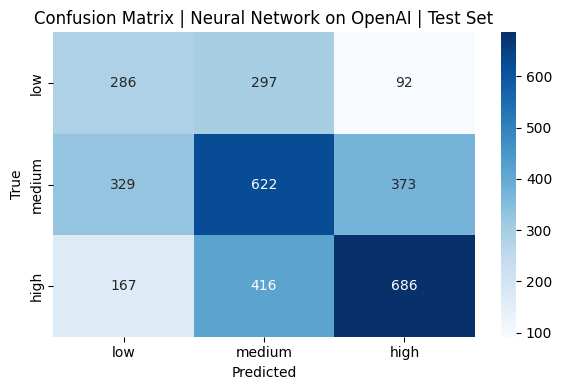

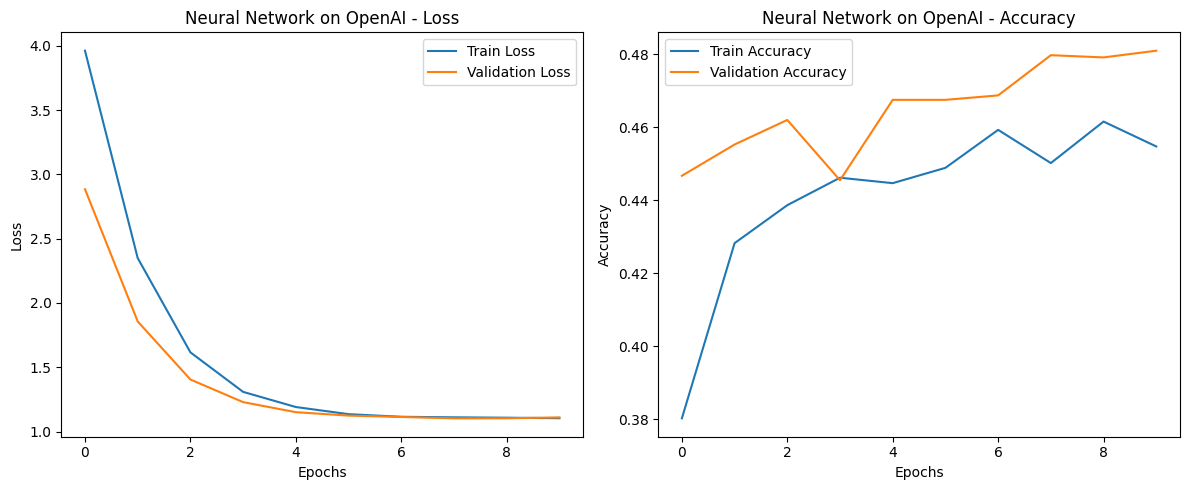

In [ ]:
# Print classification report and confusion matrix for the best input features (OpenAI features)
plot_class_report_conf_matrix(X_test_openai_scaled, y_test_enc, nn_model_openai, "Neural Network on OpenAI", nn=True, label_encoder= le)

# Plot the training history for each neural network model
plot_nn_training_history(history_openai, "Neural Network on OpenAI")